<font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 2 (Aula P4) </div> </font> 
     
    
  <font size="5"> Licenciatura em Ciência de Dados </font>

  
  
  <font size="4"> **Diana Aldea Mendes**</font>

  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
  
  
  <font size="4"> ISCTE-IUL, 21 de fevereiro de 2024 </font>
 
   
 
   
  <font size="5"> <div class="alert alert-success" role="alert"> Exemplos de regressão linear / não-linear simples </div></font> 
  



## Exemplo1 - Regressão linear simples

In [219]:
# carregar as bibliotecas que vamos usar neste notebook / script

library(dplyr) # para importar data frames
library(tidyr)
library(gmodels)
library(matrixStats)
library(corrplot)
library(MASS) # very large collection of data sets and functions.


In [220]:
# "SellingPrinters.csv": Base de dados com a quantidade e o respetivo preço
# de items que foram vendidos em variadas lojas

# Ler a base de dados
Printers <- read.csv("SellingPrinters.csv", header = TRUE, sep = ";")


In [221]:
# Analisar a base de dados
head(Printers)


,X,Sold.Items,Price
,<chr>,<int>,<int>
1,Store1,100,60
2,Store2,150,43
3,Store3,130,48
4,Store4,140,45
5,Store5,110,55
6,Store6,160,40


In [222]:
str(Printers)


'data.frame':	20 obs. of  3 variables:
 $ X         : chr  "Store1" "Store2" "Store3" "Store4" ...
 $ Sold.Items: int  100 150 130 140 110 160 115 135 120 155 ...
 $ Price     : int  60 43 48 45 55 40 53 47 52 42 ...


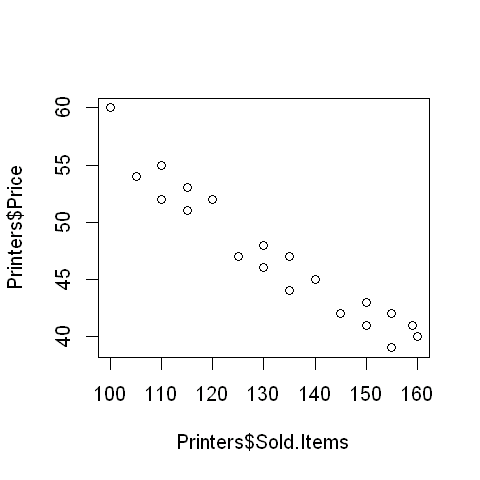

In [223]:
# definir o tamanho da figura
options(repr.plot.width = 4, repr.plot.height = 4)

# Gráfico de dispersão entre as variáveis Sold.Items e Price
plot(Printers$Sold.Items, Printers$Price)


In [224]:
# Análise de covariância e correlação
cov(Printers$Sold.Items, Printers$Price)
cor(Printers$Sold.Items, Printers$Price)


[1] -107.8105

[1] -0.9625725

In [225]:
# Calcular a correlação através da covariância
CovX_Y <- cov(Printers$Sold.Items, Printers$Price)
CovX_Y
SdSoldItems <- sd(Printers$Sold.Items)
SdSoldItems
SdPrice <- sd(Printers$Price)
SdPrice
CorrCoef <- CovX_Y / (SdSoldItems * SdPrice)
CorrCoef


[1] -107.8105

[1] 19.15202

[1] 5.848077

[1] -0.9625725

In [226]:
# Fazer o ajustamento do modelo de regressão linear simples
# Objetivo: prever o preço através das respetivas quantidades vendidas de um item
# Variável dependente (target): Price | Variável Independente: Sold.Items
LinMod <- lm(Printers$Price ~ Printers$Sold.Items, data = Printers)
LinMod



Call:
lm(formula = Printers$Price ~ Printers$Sold.Items, data = Printers)

Coefficients:
        (Intercept)  Printers$Sold.Items  
            85.9565              -0.2939  


In [227]:
# Sumário do modelo
# Beta(0): 85.95647 | Beta(1): -0.29392
summary(LinMod)


Call:
lm(formula = Printers$Price ~ Printers$Sold.Items, data = Printers)

Residuals:
   Min     1Q Median     3Q    Max 
-2.277 -1.353  0.223  1.177  3.436 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         85.95647    2.60429   33.01  < 2e-16 ***
Printers$Sold.Items -0.29392    0.01951  -15.07 1.19e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.628 on 18 degrees of freedom
Multiple R-squared:  0.9265,	Adjusted R-squared:  0.9225 
F-statistic: 227.1 on 1 and 18 DF,  p-value: 1.195e-11


# RV

# interpretações:

-> Quando é que o preço é 85,95?  resposta: Quando a quantidade "Sold.Items" for zero.

    Ou seja: O termo independente é o valor esperado da variável dependente quando todas as variáveis explicativas são nulas.

### Variações Unitárias

perante a variação unitária de uma variável independente xi (beta j) qual é o impacto na variável y (dependente)

Nota importante: a variação unitária não é necessariamente a variação de uma unidade, pois vai depender das unidades de medida em que a variável está expressa.

Por exemplo, se uma variável está expressa em milhares de dollars.
Quando ocorre uma variação unitária, ela aumenta mil dollars e não 1 dollar

@01:55


In [228]:
LinMod2 <- lm(Printers$Sold.Items ~ Printers$Price, data = Printers)
summary(LinMod2)



Call:
lm(formula = Printers$Sold.Items ~ Printers$Price, data = Printers)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5152 -5.0416  0.9086  3.6537  8.4654 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    280.6759     9.9255   28.28 2.27e-16 ***
Printers$Price  -3.1524     0.2092  -15.07 1.19e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.333 on 18 degrees of freedom
Multiple R-squared:  0.9265,	Adjusted R-squared:  0.9225 
F-statistic: 227.1 on 1 and 18 DF,  p-value: 1.195e-11


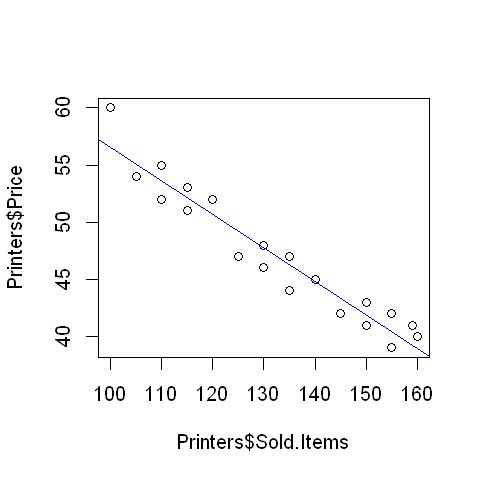

In [229]:
# Colocar no gráfico a linha de melhor ajuste calculada pelo modelo de
# regressão linear previamente ajustado
# Price = 85.95647 - (0.29392 * Sold.Items)
plot(Printers$Sold.Items, Printers$Price)
abline(LinMod, col = "blue")


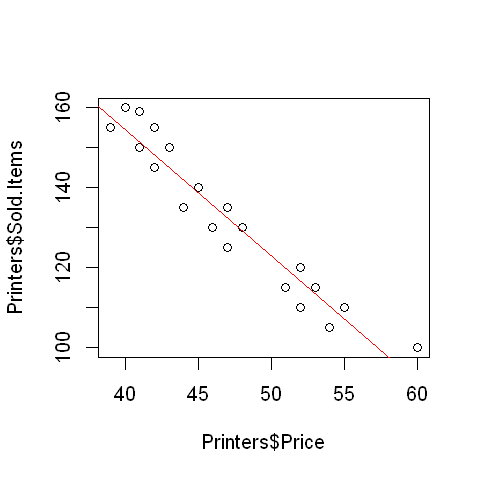

In [230]:
plot(Printers$Price, Printers$Sold.Items)
abline(LinMod2, col = "red")


# Verificação dos Pressupostos

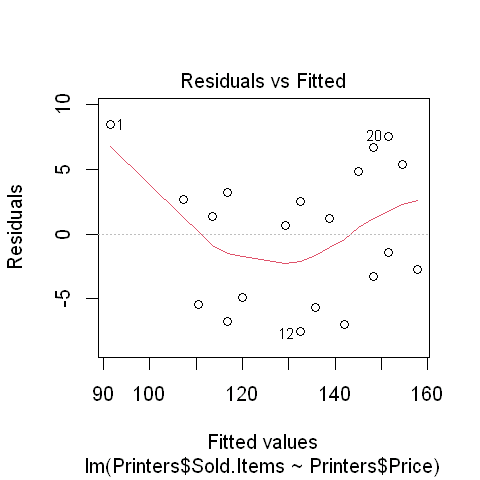

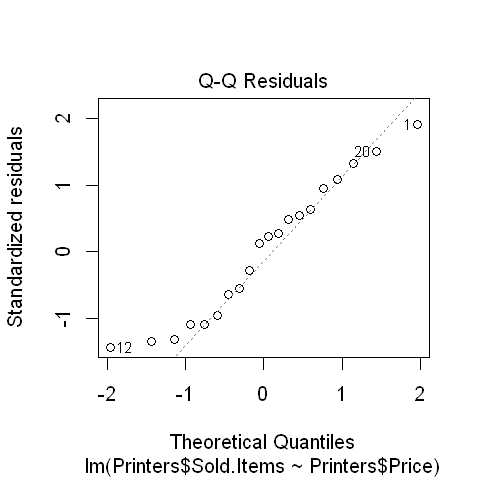

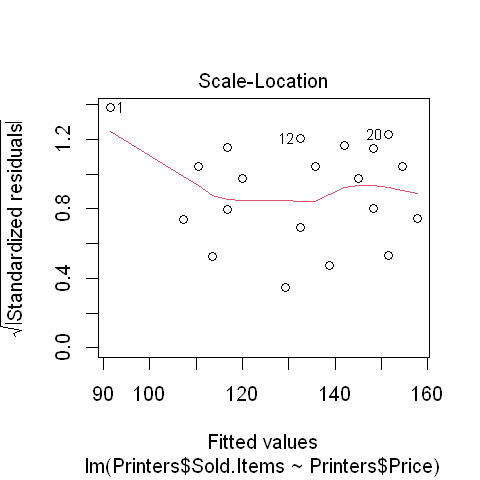

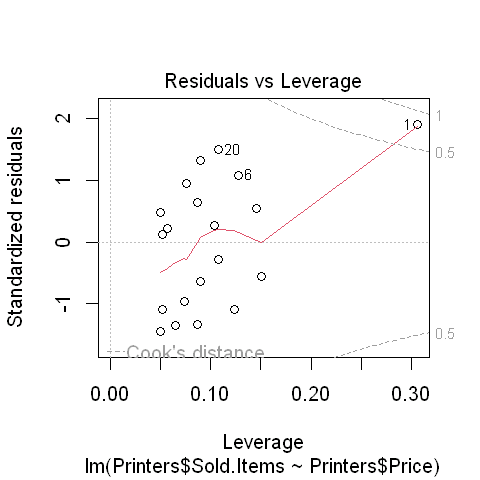

In [231]:
plot(LinMod2)


In [232]:
AIC(LinMod)


[1] 80.15432

In [233]:
AIC(LinMod2)


[1] 127.6061

In [234]:
mean(LinMod$residuals)


[1] -1.67184e-17

In [235]:
mean(LinMod2$residuals)


[1] 4.276527e-16

In [236]:
cor(LinMod$residuals, LinMod$fitted.values)


[1] 7.624967e-16

## Exemplo 2 - Regressão polinomial (não-linear na variável independente)

In [237]:
# Regressão Polinomial
# criar vetores que vão pertencer à base de dados de estudo
Time <- c(6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)
Temp <- c(4, 6, 7, 9, 10, 11, 11.5, 12, 12, 11.5, 11, 10, 9, 8)


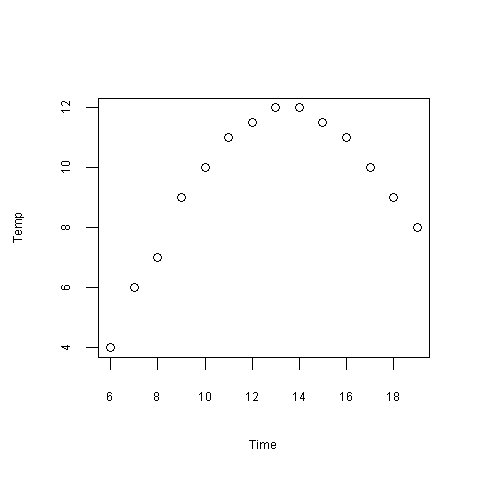

In [238]:
# gráfico de dispersão das variáveis Time e Temp
plot(Time, Temp, cex.axis = 0.6, cex.lab = 0.6)


In [239]:
cor(Time, Temp)


[1] 0.5177928

In [240]:
# Ajustar um modelo de regressão linear simples
LRfit1 <- lm(Temp ~ Time)
summary(LRfit1)



Call:
lm(formula = Temp ~ Time)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4714 -1.5978  0.5714  1.8484  2.4209 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   5.6648     1.8862   3.003   0.0110 *
Time          0.3011     0.1436   2.097   0.0579 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.166 on 12 degrees of freedom
Multiple R-squared:  0.2681,	Adjusted R-squared:  0.2071 
F-statistic: 4.396 on 1 and 12 DF,  p-value: 0.05789


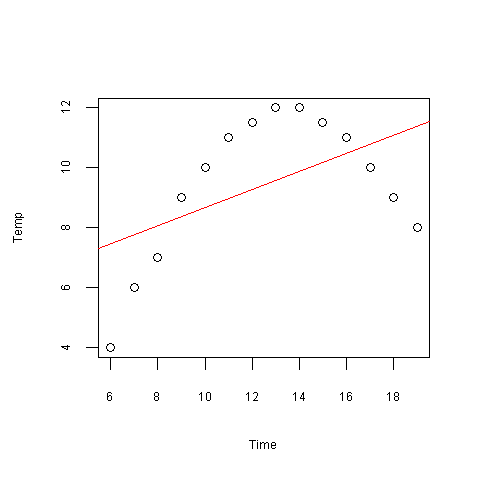

In [241]:
#
# gráfico de dispersão das variáveis Time e Temp e reta de regressão
plot(Time, Temp, cex.axis = 0.6, cex.lab = 0.6)
abline(LRfit1, col = "red")


In [242]:
# Ajustar 2 modelos de regressão polinomial diferentes
Polyfit2 <- lm(Temp ~ Time + I(Time^2))
Polyfit3 <- lm(Temp ~ Time + I(Time^2) + I(Time^3))


In [243]:
# Algoritmo alternativo para ajustar os mesmos 2 modelos
Polyfit2b <- lm(Temp ~ poly(Time, 2, raw = TRUE))
Polyfit3b <- lm(Temp ~ poly(Time, 3, raw = TRUE))


In [244]:
# Sumário dos modelos
# Pode-se observar que em Polyfit3 existem 2 variáveis
# com pouca significância explicativa
summary(Polyfit2)



Call:
lm(formula = Temp ~ Time + I(Time^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52005 -0.06387  0.03970  0.15543  0.21250 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.710165   0.601247  -22.80 1.30e-10 ***
Time          3.760920   0.102822   36.58 7.69e-13 ***
I(Time^2)    -0.138393   0.004071  -33.99 1.71e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2197 on 11 degrees of freedom
Multiple R-squared:  0.9931,	Adjusted R-squared:  0.9918 
F-statistic: 791.3 on 2 and 11 DF,  p-value: 1.301e-12


In [245]:
summary(Polyfit3)



Call:
lm(formula = Temp ~ Time + I(Time^2) + I(Time^3))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51293 -0.06900  0.04628  0.15067  0.22794 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.42402    2.05505  -6.532 6.62e-05 ***
Time          3.68179    0.55157   6.675 5.53e-05 ***
I(Time^2)    -0.13164    0.04633  -2.841   0.0175 *  
I(Time^3)    -0.00018    0.00123  -0.146   0.8866    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2302 on 10 degrees of freedom
Multiple R-squared:  0.9931,	Adjusted R-squared:  0.991 
F-statistic: 480.6 on 3 and 10 DF,  p-value: 4.183e-11


In [246]:
# Criar um dataset de teste
PredData <- data.frame(Time = seq(min(Time), max(Time), length.out = 100))
# Usar o modelo Polyfit2 para prever Temp usando o novo dataset de teste
PredData$Temp <- predict(Polyfit2, newdata = PredData)


In [247]:
# Criar um 2º dataset de teste
PredData2 <- data.frame(Time = seq(min(Time), max(Time), length.out = 100))
# Usar o modelo Polyfit3 para prever Temp usando o novo dataset de teste
PredData2$Temp <- predict(Polyfit3, newdata = PredData2)


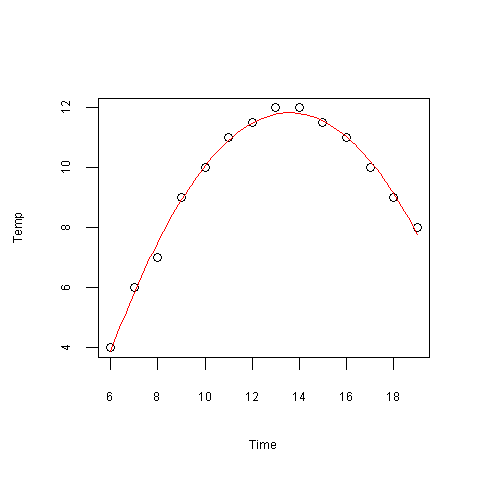

In [248]:
# Visualizar gráficamente como cada um dos modelo se ajusta aos dados originais

plot(Time, Temp, cex.axis = 0.6, cex.lab = 0.6)
lines(PredData, col = "red")
# lines(PredData2, col="blue")


## Exemplo 3 - Regressão não-linear simples (nos parâmetros)   -> não vamos utilizar!!!!!

In [249]:
# Criar uma distribuição exponencial
# Sendo esta uma função não linear, o método OLS (Mínimos Quadrados Ordinários)
# não pode ser aplicado. Ou seja, não se pode utilizar regressão linear.
# Nestes casos, pode ser usado o método dos mínimos quadrados não linear.

x <- seq(0, 200, 1)
y <- ((runif(1, 8, 25) * x) / (runif(1, 0, 7) + x)) + runif(201, 0, 1)


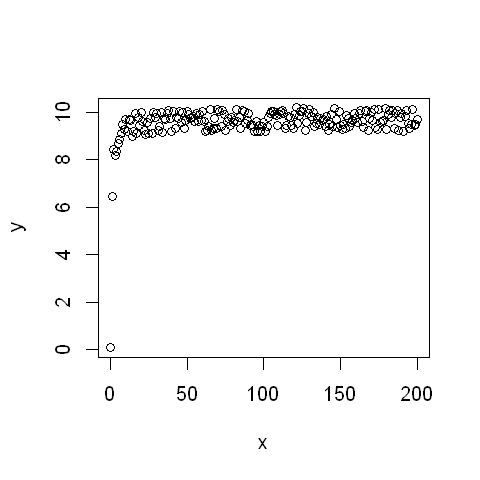

In [250]:
# Visualizar a relação das variáveis num gráfico de dispersão
plot(x, y)


In [251]:
# Ajustar um modelo de regressão linear simples aos dados
# Pode-se observar que o ajuste está longe de ideal
LModel <- lm(y ~ x)
LMSummary <- summary(LModel)
LMSummary



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1669 -0.1988  0.0784  0.3181  0.7171 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.2293884  0.1082306  85.275  < 2e-16 ***
x           0.0034790  0.0009361   3.716 0.000263 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7701 on 199 degrees of freedom
Multiple R-squared:  0.0649,	Adjusted R-squared:  0.0602 
F-statistic: 13.81 on 1 and 199 DF,  p-value: 0.0002626


In [252]:
# Ajustar um modelo de regressão não linear
# Usa-se a função nls() para utilizar este método
NLModel <- nls(y ~ a * x / (b + x), start = list(a = 1, b = 0.1))
NLMSummary <- summary(NLModel)
NLMSummary



Formula: y ~ a * x/(b + x)

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a  9.74687    0.02355  413.95   <2e-16 ***
b  0.47291    0.04363   10.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2993 on 199 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.615e-07


In [253]:
# Extrair o erro padrão residual de ambos os modelos, para serem comparados.
# O erro padrão residual da regressão não linear é substancialmente menor
# do que o do modelo de regressão linear
LMSummary$sigma
NLMSummary$sigma


[1] 0.7700811

[1] 0.2992697

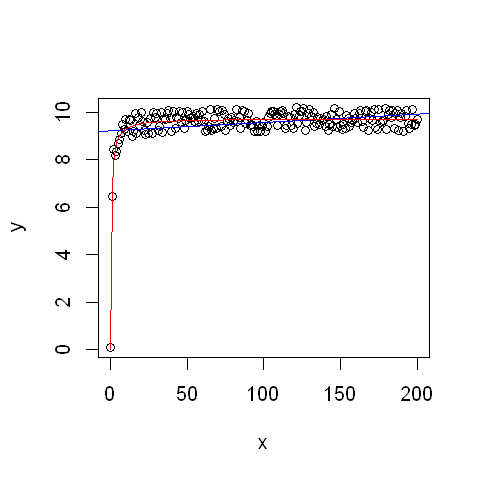

In [254]:
# Visualizar gráficamente como cada modelo se ajusta aos dados
plot(x, y)
abline(LModel, col = "blue")
lines(x, predict(NLModel), col = "red")
